# Trabajo Semanal N°4
### Alumno: Magdalena Guida

### Primeras nociones de estimacion espectral



El objetivo de este trabajo es el analisis del comportamiento de distintas señales ventaneadas a partir de sus estimadores. 
Los estimadores son funciones aplicadas sobre datosmuestrales, que sirven para reproducir el valor de un dato desconocido, para este trabajo se utilizan estimadores de amplitud: $a^i_1 = \left| X_{i_w}(\Omega_0) \right| = \left| \mathcal{F}\left\{ x(n) \cdot w_i(n) \right\} \right|$, y de frecencia $\Omega^i_1 = \arg\max_f \left\{ \left| X_{i_w}(\Omega) \right| \right\}$. Sobre ellas, se calculan 'indices' probabilisticos que pueden caracterizar la calidad del estimador.
El **sesgo**, es la diferencia entre el valor promedio del estimador y el valor 'verdadero', la **varianza** define la dispersion de los valores de la muestra.Basado sobre esto parametros, se los llama *'insesgado'* a un estimador con valor de sesgo igual a cero y *'consistente'* a un estimador cuya varianza tiende a cero con elaumento de la cantidad de muestras N. Tambien, a un estimador con varianza cercana a cero, se lo define como *'eficiente'* y *'robustos'* a los que no sufren cambios cuando se los expone tanto a valores atipicos o a desviaciones.

Las ventanas a las que se le analizara el comportamiento sobre una señal X (definida a continuacion), son: **FlatTop, BlackmanHarris** y **Hamming**. Se agrega una pequeña descripcion de cada una:

**FLATTOP**: Tiene un ensanchamiento en el lobulo principal, lo que compromete la resolucion espectral. Es utilizada para obtener amplitudes precisas.

**BLACKMANHARRIS**: Presenta una superposicion de lobulos laterales , lo que reduce fugas espectrales. Es util para minimizar el ruido.

**HAMMING**: Opcion versatil, presenta equilibrio entre la presicion en amplitud y la supresion de lobulos laterales.

Se define una señal $X = S + nn$, formada por una senoidal $S(t) = a_1*sen((w_0 + fr*df)*tt*2\pi)$, donde $a_1=\sqrt{2}$ Amplitud de la senoidal, para este caso, normalizada.  $w_0  + fr*df = w_1$, representan a omega, formada por un $w_0= fs/4$ ($fs=$ frecuencia de muestreo), y un vector de frecuencias que varian con una distribucion normal:  $fr\exists [-1/2;1/2]$ multiplicado por $df=$ resolucion en frecuencia, y $tt$, un vector de tiempos que van desde $[0;1] s$, en intervalos de $1/N = 0,001s$.  Obtengo X una matriz de $[1000;200]$.


In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.signal as sig 

#%%DEFINO PARAMETROS
SNR =10 #[dB]
R =200  #cant de realizaciones 
N = 1000 # cant de muestras ----------> esto me da dim NxR 
N_2 = 10*N
fs= 1000
ts = 1/fs
a1 = np.sqrt(2) #amplitud normalizda
w0 = fs/4
#df = 2*np.pi/N
df= fs/N
df2 = fs/N_2
pot_ruido = 10**(-SNR/10)
DS_potruido = np.sqrt(pot_ruido)      

vect_t = np.arange(0, 1, 1/N).reshape(N, 1)
tt = np.tile(vect_t, (1, R))
fr = np.random.uniform(-1/2,1/2,size = (1,R))
fr_norm = fr / np.sum(fr)
vect_w1 = w0 + fr*df

#SEÑAL LIMPIA 
S = a1*np.sin(vect_w1 * tt * 2 * np.pi) # S [1000,200]=[N,R]

Para continuar se declara $nn$, matriz de tamaño igual a S, (para poder sumarlas), como una distribucion normal que toma valores entre $[0;$ DS_potruido$=\sqrt{10^{\frac{-SNR}{10}}}]$. Esto se define asi, para obtener el valor de SNR deseado. Se hacen pruebas para SNR = 10dB y 3dB. 
Finalmente, se construye la señal X, a la cual, se la 'ventanea', con el objetico de analizar que significa cada ventana para las respuestas en el dominio frecuencial. Se usaron las ventanas: FlatTop, Blackmanharris y Hamming. La señal por si sola, se la concidera ventaneada con una 'Box'.
A la ventana se le da un tamaño de N, compatible con la matriz X, y se le aplica $reshape$, porque, la ventana es unidimensional por defecto, y se necesita un vector. 

In [22]:
#%%  Definicion X // X ventaneados

#DEF RUIDO 
vect_nn=np.random.normal(0, DS_potruido, size=(N,R))  #señal de ruido analogico
# media: 0, desvio: raiz de ruido analogico
# print(vect_nn.shape)
nn = vect_nn         # matriz de ruido 

#SEÑAL CON RUIDO  VENTANA RECT
X = S + nn    
# VENTANA FLATTOP
X_flattop = X * sig.windows.flattop(N).reshape(-1,1)
# VENATANA BLACKHARRIS
X_blackharris = X * sig.windows.blackmanharris(N).reshape(-1,1)
# VENTANA HAMMING
X_hamming = X * sig.windows.hamming(N).reshape(-1,1)

El siguiente paso, es calcular las fft de cada una de las 4 señales distintas, se declara una grilla de frecuencias desde 0Hz a 999Hz, en este caso se da asi porque esta declarado fs=N y un filtro booleano, para solo trabajar con las frecuencias menores a la frecuencia de Nyquist. Se grafica el espectro para la señal X (sin ventana).

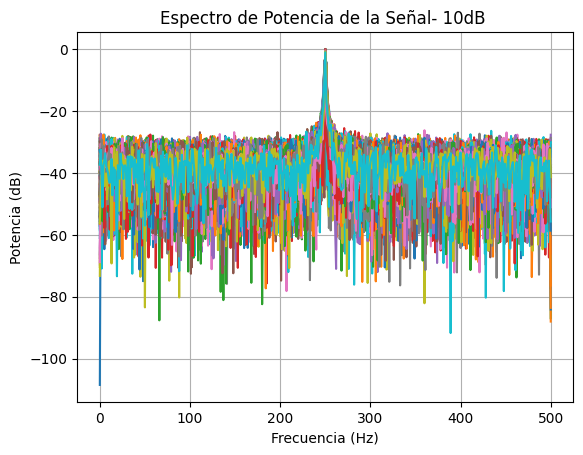

In [23]:
#%%  Def FFTs   (+ GRAFICO)
X_fft = 1/N * np.fft.fft(X, axis = 0)
X_flattop_fft = 1/N * np.fft.fft(X_flattop, axis=0)
X_blackharris_fft =  1/N * np.fft.fft(X_blackharris, axis=0)
X_hamming_fft = 1/N * np.fft.fft(X_hamming, axis=0)

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)  
bfrec = ff <= fs/2    #bfrec: filtro booleano que te deja solo las frecs hasta fs/2 = frc de nyquist

plt.figure()
plt.plot(ff[bfrec], 10* np.log10(2* np.abs(X_fft[bfrec])**2 ) )
plt.title('Espectro de Potencia de la Señal- 10dB ')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (dB)')
plt.grid(True)  # Habilitamos las líneas de grilla
axes_hdl = plt.gca()
plt.show() 

En el grafico anterio observamos la distribucion de la energia segun la frecuencia para un SNR=10dB, como era de esperar tennemos un piso de ruido que existe entre los -70dB y -30dB aproximadamente generado por $nn$ y un pico muy marcado sobre $frec=250Hz$. La frecuencia de la senoidal $w_1$ estaba formada por $w_0 = \frac{fs}{4} = \frac{1000Hz}{4} = 250Hz$ y el vector arbitrario que solo modifica a $w_1$ tal que su rango es [249,5 ; 250,5]Hz. Esa es la causa de la concentracion de potencia sobre ese valor de frecuencia. A continuacion, se ve el grafico de espectro, con una SNR=3dB. El SNR describe la relacion señal-ruido, mejorando con el aumento del valor. Al definir un SNR menor, aunque no varie por mucho, se ven diferencias: un pico menos 'pronunciado',un piso de ruido mas desparramado, que llega a un rango de valores mayores.  

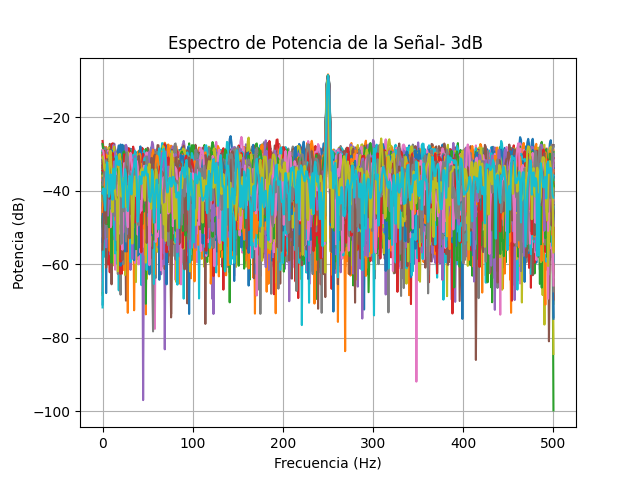

In [19]:
from IPython.display import Image
Image("C:/Users/magui/APS/TS4/graficos TS4/Espectro 3dB.png")


Con el fin del analisis del impacto de las distintas ventanas utilizadas, Flat Top, Blackman Harris y Hamming, se declaran los siguientes estimadores de amplitud $a^i_1 = \left| X_{i_w}(\Omega_0) \right| = \left| \mathcal{F}\left\{ x(n) \cdot w_i(n) \right\} \right|$, y de frecencia $\Omega^i_1 = \arg\max_f \left\{ \left| X_{i_w}(\Omega) \right| \right\}$. En el codigo, para calcularlos, se aplica la definicion sobre la fila 250 de la matriz de fft de cada señal. Se agrega a continuacion, los graficos de histograma para cada uno de los estimadores, los primeros 2 para un SNR=10dB y luego los de SNR=3dB, usados para mostrar la eficiencia de las ventanas.

In [15]:
#%% DEFINIR ESTIMADOR DE AMPLITUD = a1
#valor verdadero = a1
a1_rect = np.abs(X_fft[N//4, :])
a1_flattop = np.abs( X_flattop_fft[N//4, :])
a1_blackharris =  np.abs(X_blackharris_fft[N//4, :])
a1_hamming = np.abs(X_hamming_fft[N//4, :])
# Calculo el valor promedio de cada estimador 
a1_rect_esp = np.mean(a1_rect)
a1_flattop_esp = np.mean(a1_flattop)
a1_blackharris_esp = np.mean(a1_blackharris)
a1_hamming_esp = np.mean(a1_hamming)

#%% DEFINIR ESTIMADOR DE FRECS = omega
#valor verdadero= w0
X_fft_abs = np.abs(X_fft[:N//2, :])              
flattop_fft_abs = np.abs(X_flattop_fft[:N//2, :]) 
blackharris_fft_abs = np.abs(X_blackharris_fft[:N//2, :])
hamming_fft_abs = np.abs(X_hamming_fft[:N//2, :])
# argmax, axis=0 te tira la posicion de maximo por columna, y dsp se lo mult por la df para N/2
omega_rect = np.argmax(X_fft_abs, axis=0) * df  
omega_flattop = np.argmax(flattop_fft_abs, axis =0)* df
omega_bh = np.argmax(blackharris_fft_abs, axis =0)* df 
omega_hamming = np.argmax(hamming_fft_abs, axis=0)* df 

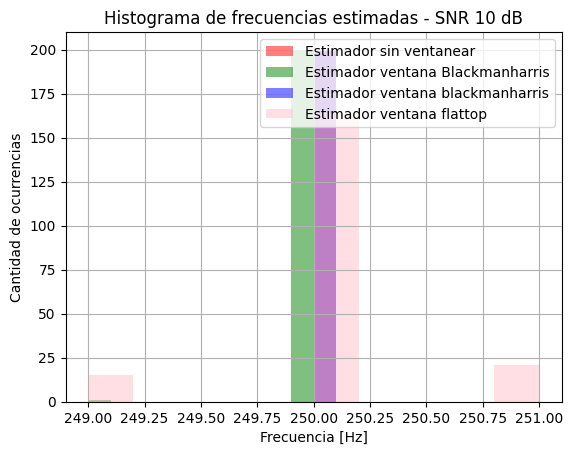

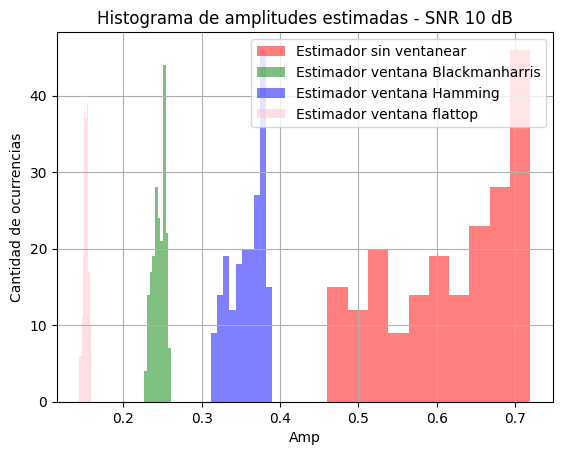

In [17]:
#%% GRAFICOS 
#Histograma omega
plt.figure()
plt.hist(omega_rect, bins=10, color='red', alpha=0.5, label="Estimador sin ventanear")
plt.hist(omega_bh, bins=10, color='green',alpha=0.5, label="Estimador ventana Blackmanharris")
plt.hist(omega_hamming, bins=10, color='blue',alpha=0.5, label="Estimador ventana blackmanharris")
plt.hist(omega_flattop, bins=10, color='pink', alpha=0.5, label="Estimador ventana flattop")
plt.title("Histograma de frecuencias estimadas - SNR 10 dB")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Cantidad de ocurrencias")
plt.grid(True)
plt.legend()
plt.show()

# Histograma a1
plt.figure()
plt.hist(a1_rect, bins=10, color='red', alpha=0.5, label="Estimador sin ventanear") #Bins: resolucion espectral del histograma; conteo relativo. ANCHURA de los valores.
plt.hist(a1_blackharris, bins=10, color='green', alpha=0.5, label="Estimador ventana Blackmanharris")
plt.hist(a1_hamming, bins=10, color='blue', alpha=0.5, label="Estimador ventana Hamming")
plt.hist(a1_flattop, bins=10, color='pink', alpha=0.5, label="Estimador ventana flattop")
plt.title("Histograma de amplitudes estimadas - SNR 10 dB")
plt.xlabel("Amp")
plt.ylabel("Cantidad de ocurrencias")
plt.grid(True)
plt.legend()
plt.show()

En el primer grafico, Histograma de frecuencias estimadas para SNR=10dB, donde el valor 'verdadero' al que se busca que los estimadores se acerquen es $frec=250Hz$. Se nota, para la ventana FlatTop la peor presicion y exactitud de todas. La demas ventanas muestran sus valores concentrados y muy cercano al verdadero. En el Histograma de frecuencias estimadas para SNR=3dB, se obtienen resultados muy parecido (no se agrega). El Histograma de amplitudes estimadas para SNR=10dB, el valor esperado para la amplitud es la mitad de la amplitud definida: $\frac{a_1}{2} =\frac{\sqrt{2}}{2} = 0,707$. Se observa como desde la ventana FlatTop a la izquierda(rosa), la Blackman Harris(verde), la Hamming(azul) y la señal sin ventanear (roja), aumenta la exactitud al costo de perder presicion.

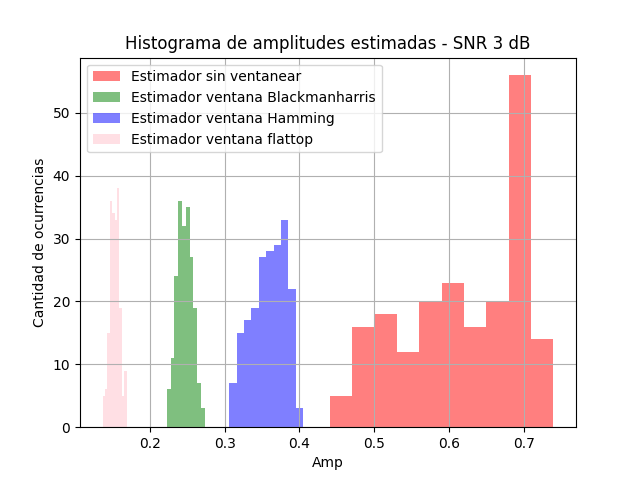

In [20]:
from IPython.display import Image
Image("C:/Users/magui/APS/TS4/graficos TS4/Histograma amplitudes 3dB.png")

El grafico anterior, Histograma de amplitudes para SNR=3dB, se ve como una generalidad que la presicion empeora, se notan las muestras mas dispersas.Igualmente, señal sin ventana, muestra mas valores sobre Amp=0,7. Los cambios que presentan los graficos, no son muy notorios porque la diferencia de SNR no llega a ser significativa.

In [25]:
# SESGO ESTIMADOR AMP
sesgo_rect_a1 = a1_rect_esp - a1 
sesgo_flattop_a1 = a1_flattop_esp-a1
sesgo_blackharris_a1 = a1_blackharris_esp-a1
sesgo_hamming_a1 = a1_hamming_esp - a1 
#VARIANZA ESTIMADOR AMP
var_a1_rect = np.var(a1_rect)
var_a1_flattop = np.var(a1_flattop)
var_a1_blackharris = np.var(a1_blackharris)
var_a1_hamming = np.var(a1_hamming)
#SESGO ESTIMADOR FREC
omega_rect_esp = np.mean(omega_rect)   #mean = valor promedio 
omega_bh_esp = np.mean(omega_bh)
omega_flattop_esp = np.mean(omega_flattop)
omega_hamming_esp = np.mean(omega_hamming)
sesgo_rect_om = omega_rect_esp- w0
sesgo_bh_om = omega_bh_esp -w0
sesgo_flattop_om = omega_flattop_esp -w0
sesgo_hamming_om = omega_hamming_esp -w0
#VARIANZA ESTIMADOR FREC
var_rect_om = np.var(omega_rect)
var_flattop_om = np.var(omega_flattop)
var_bh_om = np.var(omega_bh)
var_hamming_om = np.var(omega_hamming)

Las lineas de codigo superiores, calculan el sesgo y la varianza para cada uno de los estimadores. Estas medidas son las mas utilizadas para definir la calidad de los estimadores. El sesgo, es la diferencia entre el valor promedio del estimador y el valor 'verdadero', la varianza define la dispersion de los valores de la muestra. Se le llama 'insesgado', a un estimador con sego cero y 'consistente' a un estimador cuya varianza tiende a cero con elaumento de la cantidad de muestras N. Se agregan tablas con los valores de sesgo y varianza para cada estimador de cada ventana, en los dos distintos casos de SNR trabajados. 

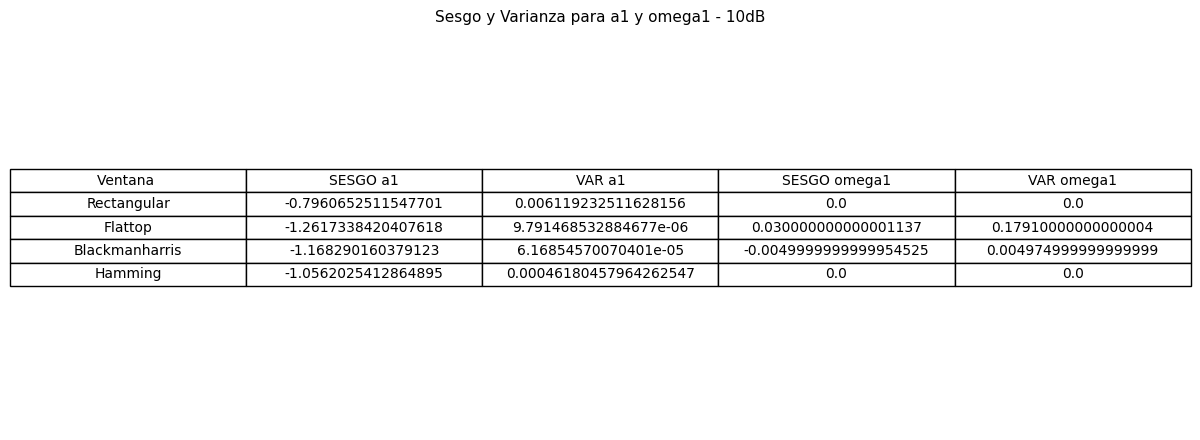

In [31]:
# Crear tabla con los encabezados fijos
tabla = [
    ["Ventana ",     "SESGO a1",      "VAR a1",      "SESGO omega1",      "VAR omega1"],
    ["Rectangular", sesgo_rect_a1, var_a1_rect, sesgo_rect_om, var_rect_om],
    ["Flattop", sesgo_flattop_a1,  var_a1_flattop, sesgo_flattop_om, var_flattop_om],
    ["Blackmanharris", sesgo_blackharris_a1,  var_a1_blackharris, sesgo_bh_om, var_bh_om],
    ["Hamming", sesgo_hamming_a1,  var_a1_hamming, sesgo_hamming_om, var_hamming_om]
]
# Mostrar como imagen
fig, ax = plt.subplots(figsize=(12, 2 + len(tabla)*0.5))
ax.axis('tight')
ax.axis('off')
plt.title("Sesgo y Varianza para a1 y omega1 - 10dB", fontsize=11, pad=1)
table = ax.table(cellText=tabla, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.tight_layout()
plt.show()

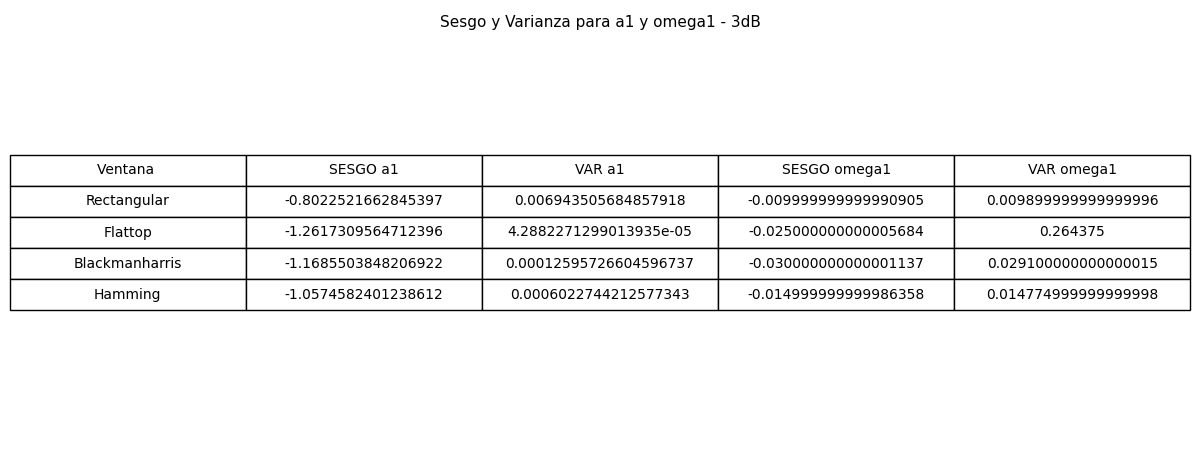

In [32]:
from IPython.display import Image
Image("C:/Users/magui/APS/TS4/graficos TS4/sego y var - 3dB.png")